# Telecom Churn Case Study(Machine learning -II)

# Problem Statement

### Business problem overview

. In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

. For many incumbent operators, retaining high profitable customers is the number one business goal.

. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Definitions of churn
. There are various ways to define churn, such as:

### Revenue-based churn:
. Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

### Usage-based churn:
Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, we will use the usage-based definition to define churn.

# Objective
. To Predict the customers who are about to churn from a telecom operator
. Business Objective is to predict the High Value Customers only
. We need to predict Churn on the basis of Action Period (Churn period data needs to be deleted after labelling)
  Churn would be based on Usage

### Requirement:

. Churn Prediction Model
. Best Predictor Variables

# Steps to Approach The  Best Solution For This Case Study
There are mainly 6 steps
#### Step 1 :
- Data reading
- Data Understanding
- Data Cleaning
- Imputing missing values 

#### Step-2 :
Need to Filter high value customers

#### Step-3 :
Derive churn
   need to Derive the Target Variable
   
#### Step-4 :
Data Preparation
  - Derived variable
  - EDA
  - Split data in to train and test sets
  - Performing Scaling
 
#### Step-5 :
- Handle class imbalance
- Dimensionality Reduction using PCA
- Classification models to predict Churn (Use various Models )

#### Step-6 :
- Model Evaluation
- Prepare Model for Predictor variables selection (Prepare multiple models & choose the best one)

Finally we need to give best Summarize to the company 

## Import  Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the logistic regression module
from sklearn.linear_model import LogisticRegression

# Importing 'variance_inflation_factor' or VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import RFE for RFE selection
from sklearn.feature_selection import RFE

# Importing statsmodels
import statsmodels.api as sm

# Importing the precision recall curve
from sklearn.metrics import precision_recall_curve

# Importing evaluation metrics from scikitlearn 
from sklearn import metrics

from imblearn.over_sampling import SMOTE

from sklearn.decomposition import IncrementalPCA

# To suppress the warnings which will be raised
import warnings
warnings.filterwarnings('ignore')

# Displaying all Columns without restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)


# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
# read data
churn = pd.read_csv("../input/telecom-churn-case-study-hackathon-38/train (1).csv")

In [3]:
churn.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
# create backup of data
original = churn.copy()

In [5]:
#look at the last 5 rows
churn.tail() 

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
69994,69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,15.760,410.924,329.136,0.00,7.36,10.93,0.00,488.46,381.64,14.96,0.0,0.0,0.00,0.0,0.0,0.00,2.44,7.19,0.00,60.64,89.66,0.00,0.00,0.00,0.0,2.43,0.86,0.00,63.09,96.86,0.00,4.91,3.73,0.00,414.61,290.14,0.0,0.0,0.0,0.0,0.0,0.0,0.00,419.53,293.88,0.00,0.0,0.0,0.00,14.05,1.83,0.0,0.0,0.0,0.00,496.68,392.58,0.00,26.59,33.84,0.00,172.33,223.91,0.00,1.06,0.00,0.00,199.99,257.76,0.00,0.00,0.00,0.00,21.99,11.79,0.0,0.0,0.00,0.0,0.0,0.0,0.00,21.99,11.79,0.00,221.99,269.56,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,1,17,13,50,397,512,50,110,130,6/18/2014,7/31/2014,8/31/2014,50,20,130,NaN,7/31/2014,8/21/2014,NaN,7.0,1.0,NaN,25.0,17.0,NaN,6.0,1.0,NaN,1.0,0.0,NaN,135.0,17.0,0.00,244.59,144.31,0.00,0.00,0.00,NaN,21.91,0.00,NaN,60.61,48.00,NaN,0.0,0.0,0,0,0,0,6,1,0,0,0,0,1,0,NaN,1.0,1.0,221,0.00,0.00,0.00,0
69995,69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,160.083,289.129,265.772,116.54,196.46,232.63,49.53,96.28,48.06,0.00,0.0,0.0,0.00,0.0,0.0,7.18,30.11,9.06,37.53,73.84,47.34,2.01,0.00,0.00,0.0,4.01,0.00,46.73,103.96,56.41,109.36,166.34,223.56,9.98,18.41,0.53,0.0,0.0,0.0,0.0,0.0,0.0,119.34,184.76,224.09,0.00,0.0,0.0,0.13,4.01,0.18,0.0,0.0,0.0,166.21,292.74,280.69,30.48,28.48,23.09,21.78,35.18,28.79,2.38,0.21,0.00,54.64,63.88,51.89,16.63,39.23,66.28,8.96,9.31,17.24,0.0,0.0,0.00,0.0,0.0,0.0,25.59,48.54,83.53,80.24,112.43,136.01,0.0,0.0,0.5,0.00,0.0,0.00,0.00,0.00,0.08,5,11,9,200,31

In [6]:
#check the columns of data
churn.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [7]:
#Checking the numerical columns data distribution statistics
churn.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [8]:
#check dataframe for null and datatype 
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [9]:
# feature type summary
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [10]:
# Checking for null values
churn.isnull().sum()

id                          0    
circle_id                   0    
loc_og_t2o_mou              702  
std_og_t2o_mou              702  
loc_ic_t2o_mou              702  
last_date_of_month_6        0    
last_date_of_month_7        399  
last_date_of_month_8        733  
arpu_6                      0    
arpu_7                      0    
arpu_8                      0    
onnet_mou_6                 2768 
onnet_mou_7                 2687 
onnet_mou_8                 3703 
offnet_mou_6                2768 
offnet_mou_7                2687 
offnet_mou_8                3703 
roam_ic_mou_6               2768 
roam_ic_mou_7               2687 
roam_ic_mou_8               3703 
roam_og_mou_6               2768 
roam_og_mou_7               2687 
roam_og_mou_8               3703 
loc_og_t2t_mou_6            2768 
loc_og_t2t_mou_7            2687 
loc_og_t2t_mou_8            3703 
loc_og_t2m_mou_6            2768 
loc_og_t2m_mou_7            2687 
loc_og_t2m_mou_8            3703 
loc_og_t2f_mou

In [11]:
# Checking the null value percentage
churn.isna().sum()/churn.isna().count()*100

id                          0.000000 
circle_id                   0.000000 
loc_og_t2o_mou              1.002871 
std_og_t2o_mou              1.002871 
loc_ic_t2o_mou              1.002871 
last_date_of_month_6        0.000000 
last_date_of_month_7        0.570008 
last_date_of_month_8        1.047158 
arpu_6                      0.000000 
arpu_7                      0.000000 
arpu_8                      0.000000 
onnet_mou_6                 3.954342 
onnet_mou_7                 3.838626 
onnet_mou_8                 5.290076 
offnet_mou_6                3.954342 
offnet_mou_7                3.838626 
offnet_mou_8                5.290076 
roam_ic_mou_6               3.954342 
roam_ic_mou_7               3.838626 
roam_ic_mou_8               5.290076 
roam_og_mou_6               3.954342 
roam_og_mou_7               3.838626 
roam_og_mou_8               5.290076 
loc_og_t2t_mou_6            3.954342 
loc_og_t2t_mou_7            3.838626 
loc_og_t2t_mou_8            5.290076 
loc_og_t2m_m

In [12]:
# Checking for shape of a data set
churn.shape

(69999, 172)

In [13]:
# Checking for the duplicates
churn.drop_duplicates(subset=None, inplace=True)
churn.shape

(69999, 172)

In [14]:
#check the size of data
churn.size

12039828

In [15]:
#check the axes of data
churn.axes

[Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             69989, 69990, 69991, 69992, 69993, 69994, 69995, 69996, 69997,
             69998],
            dtype='int64', length=69999),
 Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
        'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
        'arpu_6', 'arpu_7',
        ...
        'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
        'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
       dtype='object', length=172)]

In [16]:
#check the dimensions of data
churn.ndim

2

In [17]:
#check the values of data
churn.values

array([[0, 109, 0.0, ..., 0.0, 0.0, 0],
       [1, 109, 0.0, ..., 0.0, 0.0, 0],
       [2, 109, 0.0, ..., 0.0, 0.0, 0],
       ...,
       [69996, 109, 0.0, ..., 0.0, 0.0, 0],
       [69997, 109, 0.0, ..., 1402.96, 990.97, 0],
       [69998, 109, 0.0, ..., 0.0, 0.0, 0]], dtype=object)

In [18]:
#list of columns
pd.DataFrame(churn.columns)

,0
0,id
1,circle_id
2,loc_og_t2o_mou
3,std_og_t2o_mou
4,loc_ic_t2o_mou
5,last_date_of_month_6
6,last_date_of_month_7
7,last_date_of_month_8
8,arpu_6
9,arpu_7


In [19]:
# look at missing value ratio in each column
churn.isnull().sum()*100/churn.shape[0]

id                          0.000000 
circle_id                   0.000000 
loc_og_t2o_mou              1.002871 
std_og_t2o_mou              1.002871 
loc_ic_t2o_mou              1.002871 
last_date_of_month_6        0.000000 
last_date_of_month_7        0.570008 
last_date_of_month_8        1.047158 
arpu_6                      0.000000 
arpu_7                      0.000000 
arpu_8                      0.000000 
onnet_mou_6                 3.954342 
onnet_mou_7                 3.838626 
onnet_mou_8                 5.290076 
offnet_mou_6                3.954342 
offnet_mou_7                3.838626 
offnet_mou_8                5.290076 
roam_ic_mou_6               3.954342 
roam_ic_mou_7               3.838626 
roam_ic_mou_8               5.290076 
roam_og_mou_6               3.954342 
roam_og_mou_7               3.838626 
roam_og_mou_8               5.290076 
loc_og_t2t_mou_6            3.954342 
loc_og_t2t_mou_7            3.838626 
loc_og_t2t_mou_8            5.290076 
loc_og_t2m_m

In [20]:
# some recharge columns have minimum value of 1 while some don't have
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
                 ]

churn[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


 We can create new feature as total_rech_amt_data using total_rech_data and av_rech_amt_data to capture amount utilized by customer for data.

 Also as the minimum value is 1 we can impute the NA values by 0, Considering there were no recharges done by the customer.

In [21]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
churn.loc[churn.total_rech_data_6.isnull() & churn.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
8,NaN,NaN
9,NaN,NaN
11,NaN,NaN
12,NaN,NaN


In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbers that month.

In [22]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]

In [23]:
# impute missing values with 0
churn[zero_impute] = churn[zero_impute].apply(lambda x: x.fillna(0))

In [24]:
# now we have to  make sure the values are imputed correctly for that we can check "Missing value ratio"
churn[zero_impute].isnull().sum()*100/churn.shape[1]

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64

In [25]:
# now we can check the "statistics Summary"
churn[zero_impute].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,0.619309,0.683981,0.697867,48.395787,51.415168,51.782975,31.748339,32.260075,32.986614
std,1.762010,1.943193,1.973434,126.923180,133.246541,131.291162,77.519536,78.069163,78.808337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,8.000000,17.000000,23.000000,8.000000,14.000000,17.000000
max,61.000000,54.000000,60.000000,5920.000000,4365.000000,4076.000000,1555.000000,1555.000000,1555.000000


In [26]:
# now we can create some column name list by there types using description of columns
id_cols = ['id', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',             
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',             
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'             
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',             
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'             
            ]

num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == churn.shape[1])

#ID cols: 2
#Date cols:9
#Numeric cols:155
#Category cols:6
True


In [27]:
# drop id and date columns
churn = churn.drop(id_cols + date_cols, axis=1)
#check the shape again
churn.shape

(69999, 161)

In [28]:
# replace missing values with '-1' in categorical columns
churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna(-1))

In [29]:
# missing value ratio
churn[cat_cols].isnull().sum()*100/churn.shape[0]

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64

Droping variables with more than 70% of missing values (we can call it as threshold )

In [30]:
initial_cols = churn.shape[1]

MISSING_THRESHOLD = 0.5

include_cols = list(churn.apply(lambda column: True if column.isnull().sum()/churn.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':churn.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,onnet_mou_6,True
7,onnet_mou_7,True
8,onnet_mou_8,True
9,offnet_mou_6,True


In [31]:
# now we can drop  some more columns
churn = churn.loc[:, include_cols]

dropped_cols = churn.shape[1] - initial_cols
dropped_cols

-12

In [32]:
#rechecking the shape of a dataframe
churn.shape

(69999, 149)

In [33]:
# rechecking the missing values for how many missing values has left
churn.isnull().sum()*100/churn.shape[0]

loc_og_t2o_mou        1.002871
std_og_t2o_mou        1.002871
loc_ic_t2o_mou        1.002871
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
onnet_mou_6           3.954342
onnet_mou_7           3.838626
onnet_mou_8           5.290076
offnet_mou_6          3.954342
offnet_mou_7          3.838626
offnet_mou_8          5.290076
roam_ic_mou_6         3.954342
roam_ic_mou_7         3.838626
roam_ic_mou_8         5.290076
roam_og_mou_6         3.954342
roam_og_mou_7         3.838626
roam_og_mou_8         5.290076
loc_og_t2t_mou_6      3.954342
loc_og_t2t_mou_7      3.838626
loc_og_t2t_mou_8      5.290076
loc_og_t2m_mou_6      3.954342
loc_og_t2m_mou_7      3.838626
loc_og_t2m_mou_8      5.290076
loc_og_t2f_mou_6      3.954342
loc_og_t2f_mou_7      3.838626
loc_og_t2f_mou_8      5.290076
loc_og_t2c_mou_6      3.954342
loc_og_t2c_mou_7      3.838626
loc_og_t2c_mou_8      5.290076
loc_og_mou_6          3.954342
loc_og_mou_7          3.838626
loc_og_m

In [34]:
num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]
num_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou

In [35]:
#imputing with meadian for num_cols
churn[num_cols] = churn[num_cols].apply(lambda x: x.fillna(x.median()))

In [36]:
#again checking for the missing values
churn.isnull().sum()*100/churn.shape[0]

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_m

In churn prediction, we assume that there are three phases of customer lifecycle :

. The ‘good’ phase [Month 6 & 7]
. The ‘action’ phase [Month 8]
. The ‘churn’ phase [Month 9]
In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

# Step 2:

# Filter high-value customers

Here we can take good phase ( it means month 6 and 7) data to get high value customers

In [37]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

add total data recharge and total recharge to get total combined recharge amount for a month

In [38]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

In [39]:
# calculate average recharge done by customer in June and July
churn['av_amt_data_6_7'] = (churn.amt_data_6 + churn.amt_data_7)/2

In [40]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churn.av_amt_data_6_7.quantile(0.7)))


Recharge amount at 70th percentile: 477.5


In [41]:
churn.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,1958,0.0,0.0,0.0,0,0.0,0.0,77.0,65.0,71.0
1,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,-1.0,0.0,-1.0,0,0,0,0,0,0,0,1,0,0,0,0,-1.0,1.0,-1.0,710,0.0,0.0,0.0,0,0.0,145.0,0.0,290.0,145.0
2,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31

In [42]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered = churn.loc[churn.av_amt_data_6_7 >= churn.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)


In [43]:
churn_filtered.shape

(21013, 154)

In [44]:
# delete variables created to filter high-value customers
churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)


In [45]:
churn_filtered.shape

(21013, 149)

 hear we're left with 21,013 rows  and 149 columns after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

# Step 3:

# Derive churn

Derive churn means hear we are using 8 month(The ‘churn’ phase) data , To get the target variable(In this case stydy they did not provide any target variable we have to derive it from churn phase data)
For that, we need to find the derive churn variable using total_ic_mou_8,total_og_mou_8,vol_2g_mb_8 and vol_3g_mb_8 attributes

In [46]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']
churn_filtered[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_8  21013 non-null  float64
 1   total_og_mou_8  21013 non-null  float64
 2   vol_2g_mb_8     21013 non-null  float64
 3   vol_3g_mb_8     21013 non-null  float64
dtypes: float64(4)
memory usage: 656.8 KB


0    27.534679
1    2.484321 
Name: churn_probability, dtype: float64


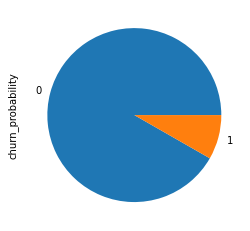

In [47]:
# lets find out churn/non churn percentage
print((churn_filtered['churn_probability'].value_counts()/len(churn))*100)
((churn_filtered['churn_probability'].value_counts()/len(churn))*100).plot(kind="pie")
plt.show()

#### ***As we can see that 90% of the customers do not churn, there is a possibility of class imbalance*** 
Since this variable churn is the target variable, all the columns relating to this variable(i.e. all columns with suffix _8) can be dropped forn the dataset.


We can still clean the data by few possible columns relating to the good phase.

As we derived few columns in the good phase earlier, we can drop those related columns during creation.

In [48]:
#churn['total_rech_amt_data_6']=churn['av_rech_amt_data_6'] * churn['total_rech_data_6']
# churn['total_rech_amt_data_7']=churn['av_rech_amt_data_7'] * churn['total_rech_data_7']

# # Calculating the overall recharge amount for the months 6,7 and 8

# churn['overall_rech_amt_6'] = churn['total_rech_amt_data_6'] + churn['total_rech_amt_6']
# churn['overall_rech_amt_7'] = churn['total_rech_amt_data_7'] + churn['total_rech_amt_7']

churn_filtered.drop(['av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

We can also create new columns for the defining the good phase variables and drop the seperate 6th and 7 month variables.

Before proceding to check the remaining missing value handling, let us check the collineartity of the indepedent variables and try to understand their dependencies.

In [49]:
# creating a list of column names for each month
mon_6_cols = [col for col in churn_filtered.columns if '_6' in col]
mon_7_cols = [col for col in churn_filtered.columns if '_7' in col]
mon_8_cols = [col for col in churn_filtered.columns if '_8' in col]

In [50]:
mon_7_cols

['arpu_7',
 'onnet_mou_7',
 'offnet_mou_7',
 'roam_ic_mou_7',
 'roam_og_mou_7',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_7',
 'loc_og_mou_7',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_7',
 'std_og_mou_7',
 'isd_og_mou_7',
 'spl_og_mou_7',
 'og_others_7',
 'total_og_mou_7',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_7',
 'std_ic_t2o_mou_7',
 'std_ic_mou_7',
 'total_ic_mou_7',
 'spl_ic_mou_7',
 'isd_ic_mou_7',
 'ic_others_7',
 'total_rech_num_7',
 'max_rech_amt_7',
 'last_day_rch_amt_7',
 'max_rech_data_7',
 'vol_2g_mb_7',
 'vol_3g_mb_7',
 'night_pck_user_7',
 'monthly_2g_7',
 'sachet_2g_7',
 'monthly_3g_7',
 'sachet_3g_7',
 'fb_user_7']

In [51]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
churn_corr = churn_filtered.corr()
churn_corr.loc[:,:] = np.tril(churn_corr, k=-1)
churn_corr = churn_corr.stack()
churn_corr
churn_corr[(churn_corr > 0.80) | (churn_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8               0.958953
fb_user_6           night_pck_user_6     0.957744
isd_og_mou_8        isd_og_mou_7         0.956635
fb_user_7           night_pck_user_7     0.955499
fb_user_8           night_pck_user_8     0.954382
isd_og_mou_7        isd_og_mou_6         0.936012
isd_og_mou_8        isd_og_mou_6         0.934200
total_ic_mou_6      loc_ic_mou_6         0.901348
total_ic_mou_8      loc_ic_mou_8         0.898511
sachet_2g_8         total_rech_data_8    0.897476
total_ic_mou_7      loc_ic_mou_7         0.883143
std_og_t2t_mou_7    onnet_mou_7          0.861786
std_og_t2t_mou_6    onnet_mou_6          0.860921
std_og_t2t_mou_8    onnet_mou_8          0.858635
std_og_t2m_mou_7    offnet_mou_7         0.857958
std_og_t2m_mou_8    offnet_mou_8         0.855066
total_og_mou_8      std_og_mou_8         0.850737
total_og_mou_7      std_og_mou_7         0.850341
loc_ic_mou_6        loc_ic_t2m_mou_6     0.846101
loc_og_mou_8        loc_og_mou_7         0.842607


In [52]:
col_to_drop=['fb_user_6','fb_user_7','total_ic_mou_6','total_ic_mou_7',               
               'std_og_t2t_mou_7','std_og_t2t_mou_6' ,'std_og_t2m_mou_7','std_ic_mou_7',]

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
churn_filtered.drop(col_to_drop, axis=1, inplace=True)

In [53]:
# The curent dimension of the dataset after dropping few unwanted columns
churn_filtered.shape

(21013, 135)

# Step 4:
# Data preparation

# i.Deriving new variables to understand the data 

# ii.EDA

In [54]:
# We have a column called 'aon'

# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
churn_filtered['tenure'] = (churn_filtered['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
churn_filtered.drop('aon',axis=1, inplace=True)

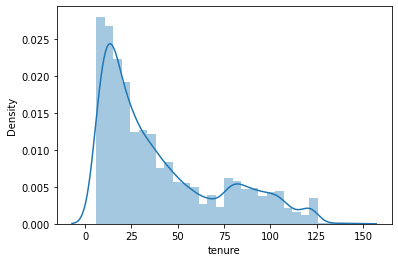

In [55]:
# Checking the distribution of he tenure variable

sns.distplot(churn_filtered['tenure'],bins=30)
plt.show()

In [56]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
churn_filtered['tenure_range'] = pd.cut(churn_filtered['tenure'], tn_range, labels=tn_label)
churn_filtered['tenure_range'].head()

0    1-2 Yrs
1    1-2 Yrs
2    1-2 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

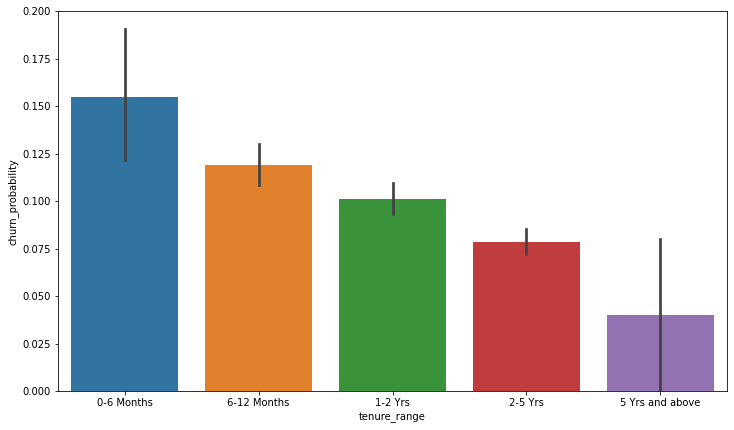

In [57]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn_probability', data=churn_filtered)
plt.show()

It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.

The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two separate averages, lets take an average to these two and drop the other columns

In [58]:
churn_filtered["avg_arpu_6_7"]= (churn_filtered['arpu_6']+churn_filtered['arpu_7'])/2
churn_filtered['avg_arpu_6_7'].head()

0    184.4495 
1    478.9215 
2    1018.2270
3    362.0215 
4    370.7370 
Name: avg_arpu_6_7, dtype: float64

In [59]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data

churn_filtered.drop(['arpu_6','arpu_7'], axis=1, inplace=True)


# The curent dimension of the dataset after dropping few unwanted columns
churn_filtered.shape

(21013, 135)

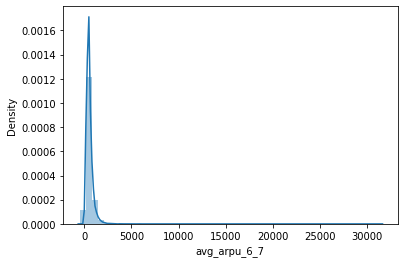

In [60]:
# Visualizing the column created
sns.distplot(churn_filtered['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

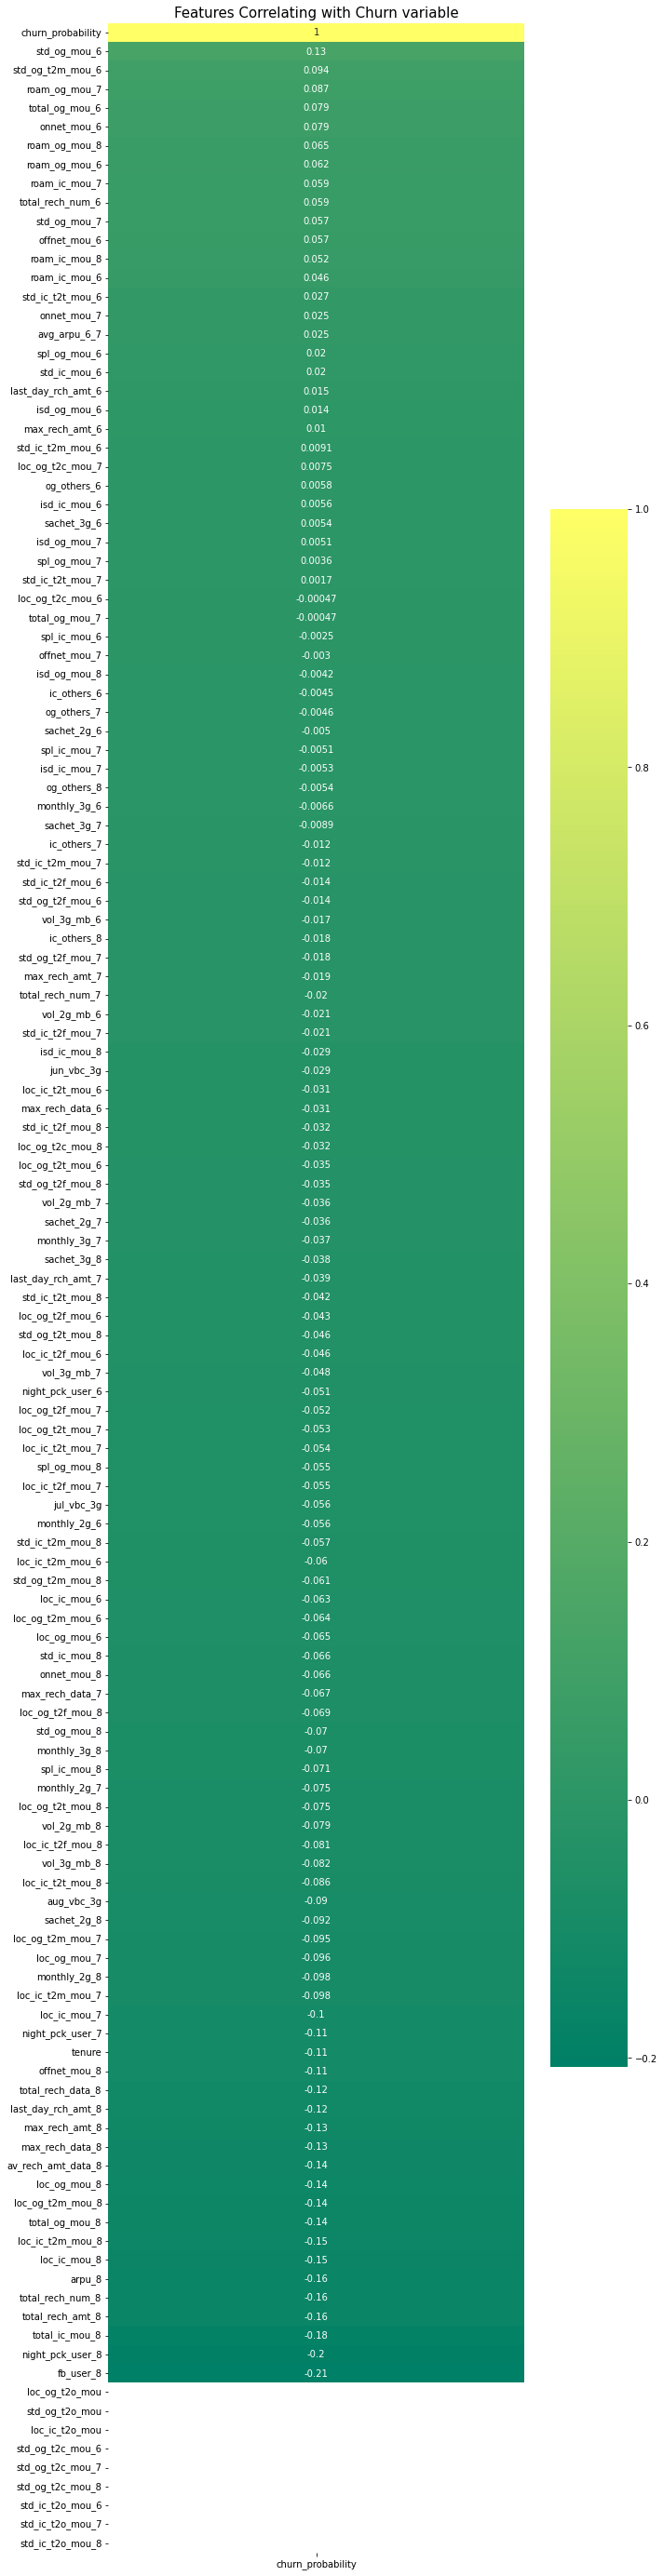

In [61]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(churn_filtered.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

In [62]:
churn_filtered.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_8', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'churn_probability', 'tenure', 'tenure_range',
       'avg_arpu_6_7'],
      dtype='object', length=135)

. Avg Outgoing Calls & calls on roaming for 6 & 7th months are positively correlated with churn.
. Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

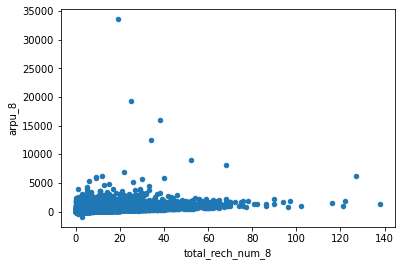

In [63]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
churn_filtered[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

In [64]:
# Creating categories for month 8 column totalrecharge and their count
churn_filtered['total_rech_data_group_8']=pd.cut(churn_filtered['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
churn_filtered['total_rech_num_group_8']=pd.cut(churn_filtered['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_8 variable
 <=10_Recharges     10729
No_Recharge        9833 
10-25_Recharges    421  
>25_Recharges      30   
Name: total_rech_data_group_8, dtype: int64


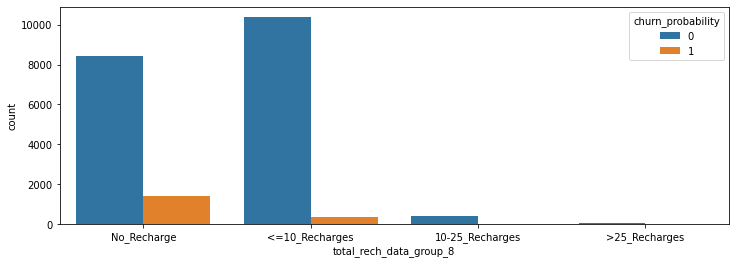

					Distribution of total_rech_num_8 variable
 <=10_Recharges     13533
10-25_Recharges    5829 
>25_Recharges      1255 
No_Recharge        396  
Name: total_rech_num_group_8, dtype: int64


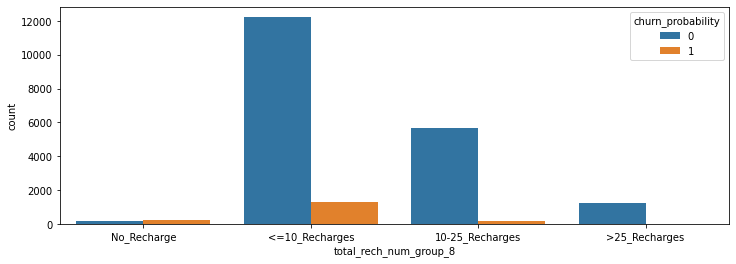

In [65]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=churn_filtered,x="total_rech_data_group_8",hue="churn_probability")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",churn_filtered['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=churn_filtered,x="total_rech_num_group_8",hue="churn_probability")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",churn_filtered['total_rech_num_group_8'].value_counts())
plt.show()

As the number of recharge rate increases, the churn rate decreases clearly.

In [66]:
churn_filtered.drop(['av_rech_amt_data_8','total_rech_data_8','sachet_2g_6','sachet_2g_7','sachet_3g_6',
              'sachet_3g_7','sachet_3g_8','last_day_rch_amt_6','last_day_rch_amt_7',
              'last_day_rch_amt_8',], axis=1, inplace=True)

In [67]:
churn_filtered.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
         'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
         'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
         'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
         'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
         'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
         'spl_og_mou_7', 'spl_og_mou_8','total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
         'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
         'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
         'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
         'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
         'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',], axis=1, inplace=True)

In [68]:
churn_filtered.shape

(21013, 56)

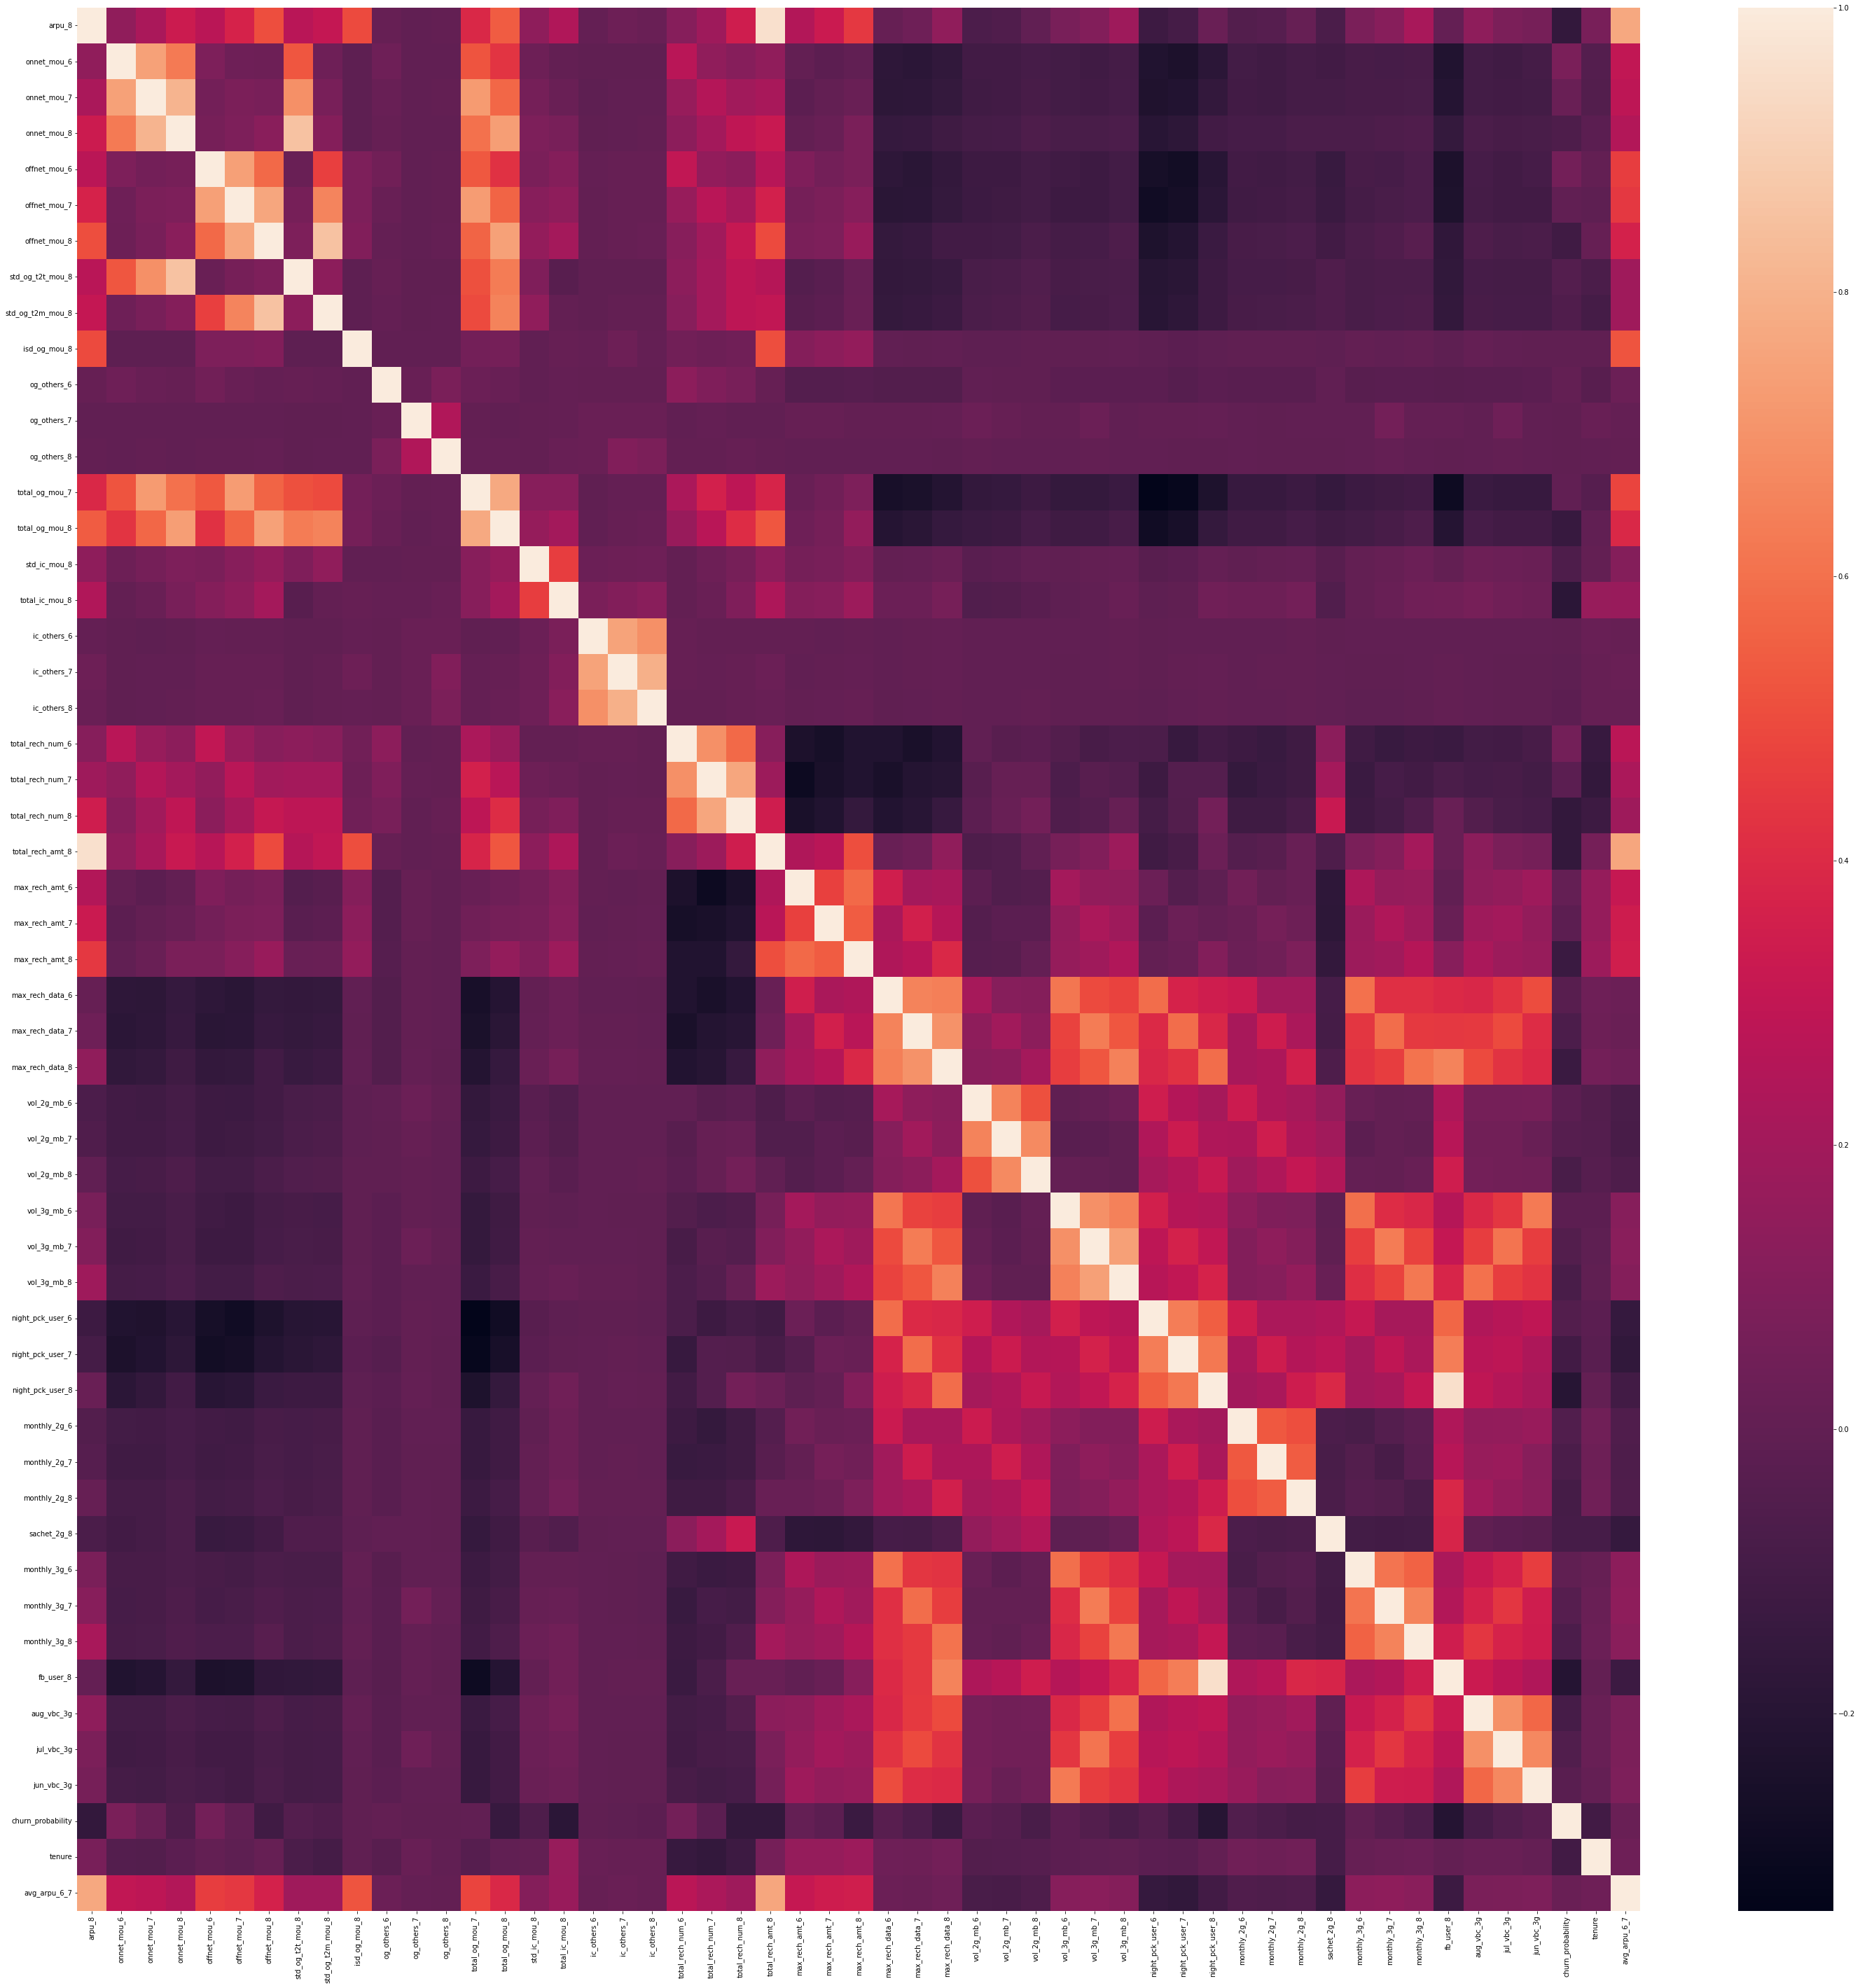

In [69]:
plt.figure(figsize = (50, 50))
sns.heatmap(churn_filtered.corr())
plt.show()

In [70]:
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   arpu_8                   21013 non-null  float64 
 1   onnet_mou_6              21013 non-null  float64 
 2   onnet_mou_7              21013 non-null  float64 
 3   onnet_mou_8              21013 non-null  float64 
 4   offnet_mou_6             21013 non-null  float64 
 5   offnet_mou_7             21013 non-null  float64 
 6   offnet_mou_8             21013 non-null  float64 
 7   std_og_t2t_mou_8         21013 non-null  float64 
 8   std_og_t2m_mou_8         21013 non-null  float64 
 9   isd_og_mou_8             21013 non-null  float64 
 10  og_others_6              21013 non-null  float64 
 11  og_others_7              21013 non-null  float64 
 12  og_others_8              21013 non-null  float64 
 13  total_og_mou_7           21013 non-null  float64 
 14  total_

In [71]:
churn_filtered.drop(['total_rech_data_group_8','total_rech_num_group_8',] , axis=1, inplace=True)

In [72]:
churn_filtered.shape

(21013, 54)

In [73]:
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   arpu_8             21013 non-null  float64 
 1   onnet_mou_6        21013 non-null  float64 
 2   onnet_mou_7        21013 non-null  float64 
 3   onnet_mou_8        21013 non-null  float64 
 4   offnet_mou_6       21013 non-null  float64 
 5   offnet_mou_7       21013 non-null  float64 
 6   offnet_mou_8       21013 non-null  float64 
 7   std_og_t2t_mou_8   21013 non-null  float64 
 8   std_og_t2m_mou_8   21013 non-null  float64 
 9   isd_og_mou_8       21013 non-null  float64 
 10  og_others_6        21013 non-null  float64 
 11  og_others_7        21013 non-null  float64 
 12  og_others_8        21013 non-null  float64 
 13  total_og_mou_7     21013 non-null  float64 
 14  total_og_mou_8     21013 non-null  float64 
 15  std_ic_mou_8       21013 non-null  float64 
 16  tota

In [74]:
churn_filtered.drop(['tenure_range'] , axis=1, inplace=True)

In [75]:
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   arpu_8             21013 non-null  float64
 1   onnet_mou_6        21013 non-null  float64
 2   onnet_mou_7        21013 non-null  float64
 3   onnet_mou_8        21013 non-null  float64
 4   offnet_mou_6       21013 non-null  float64
 5   offnet_mou_7       21013 non-null  float64
 6   offnet_mou_8       21013 non-null  float64
 7   std_og_t2t_mou_8   21013 non-null  float64
 8   std_og_t2m_mou_8   21013 non-null  float64
 9   isd_og_mou_8       21013 non-null  float64
 10  og_others_6        21013 non-null  float64
 11  og_others_7        21013 non-null  float64
 12  og_others_8        21013 non-null  float64
 13  total_og_mou_7     21013 non-null  float64
 14  total_og_mou_8     21013 non-null  float64
 15  std_ic_mou_8       21013 non-null  float64
 16  total_ic_mou_8     210

In [76]:
churn_rate = (sum(churn_filtered["churn_probability"])/len(churn_filtered["churn_probability"].index))*100
churn_rate

8.275829248560415

# v.Split Data Into Train and Test Data

In [77]:
churn_filtered.shape

(21013, 53)

In [78]:
# divide data into train and test
X = churn_filtered.drop("churn_probability", axis = 1)
y = churn_filtered.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [79]:
# print shapes of train and test sets
X_train.shape

(15759, 52)

In [80]:
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15759,)
(5254, 52)
(5254,)


# vi.Perform Scaling

In [81]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_7,total_og_mou_8,std_ic_mou_8,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
13528,553.107,597.83,448.53,594.29,149.26,175.73,299.99,569.78,194.28,0.00,2.31,0.0,0.0,567.31,811.06,20.54,74.66,0.00,0.00,0.00,10,10,9,677,128,110,150,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.00,99.0,533.9885
7183,199.111,364.79,617.33,51.71,124.69,258.86,40.08,0.00,0.00,0.00,0.00,0.0,0.0,843.16,0.00,0.00,0.00,0.00,0.00,0.00,19,27,5,180,36,50,50,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.00,37.0,520.9410
14666,267.706,84.68,117.61,87.43,552.86,510.43,383.46,3.40,30.44,1.55,0.00,0.0,0.0,628.04,470.89,77.16,679.71,3.83,5.28,13.16,2,6,2,200,150,215,200,152.0,152.0,152.0,17.59,25.76,42.74,495.46,397.32,289.58,0.0,0.0,0.0,0,0,0,1,0,0,0,1.0,197.37,288.6,185.75,93.0,397.1430
17922,409.262,636.51,728.43,700.23,177.04,137.53,162.48,694.38,135.54,0.00,0.00,0.0,0.0,865.96,862.88,18.84,25.21,0.00,0.00,0.00,11,10,11,596,110,110,130,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.00,12.0,444.9220
5165,293.627,739.41,185.51,66.08,481.24,673.68,534.98,53.94,488.14,0.00,0.00,0.0,0.0,861.13,547.49,10.98,24.11,0.00,0.00,0.00,12,13,6,360,110,110,130,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,-1.0,0.00,0.0,0.00,32.0,470.9800


In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15759 entries, 13528 to 20561
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   arpu_8            15759 non-null  float64
 1   onnet_mou_6       15759 non-null  float64
 2   onnet_mou_7       15759 non-null  float64
 3   onnet_mou_8       15759 non-null  float64
 4   offnet_mou_6      15759 non-null  float64
 5   offnet_mou_7      15759 non-null  float64
 6   offnet_mou_8      15759 non-null  float64
 7   std_og_t2t_mou_8  15759 non-null  float64
 8   std_og_t2m_mou_8  15759 non-null  float64
 9   isd_og_mou_8      15759 non-null  float64
 10  og_others_6       15759 non-null  float64
 11  og_others_7       15759 non-null  float64
 12  og_others_8       15759 non-null  float64
 13  total_og_mou_7    15759 non-null  float64
 14  total_og_mou_8    15759 non-null  float64
 15  std_ic_mou_8      15759 non-null  float64
 16  total_ic_mou_8    15759 non-null  fl

In [83]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [84]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [85]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_7,total_og_mou_8,std_ic_mou_8,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
13528,0.043460,0.081043,0.054982,0.059564,0.017849,0.029850,0.021417,0.071094,0.013927,0.000000,0.003788,0.0,0.0,0.068469,0.057755,0.005437,0.015553,0.000000,0.00000,0.000000,0.058824,0.072464,0.065217,0.014938,0.031920,0.033343,0.033715,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.673913,0.030909
7183,0.033196,0.049452,0.075674,0.005183,0.014911,0.043970,0.002861,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.101762,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.111765,0.195652,0.036232,0.003972,0.008978,0.015156,0.011238,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.224638,0.030500
14666,0.035185,0.011479,0.014417,0.008763,0.066113,0.086703,0.027376,0.000424,0.002182,0.000427,0.000000,0.0,0.0,0.075799,0.033532,0.020424,0.141594,0.002849,0.00353,0.010877,0.011765,0.043478,0.014493,0.004413,0.037406,0.065171,0.044954,0.097749,0.097749,0.097749,0.00171,0.003272,0.003844,0.010833,0.014117,0.009641,0.5,0.5,0.5,0.0,0.0,0.0,0.022727,0.0,0.0,0.0,1.0,0.015281,0.031487,0.016635,0.630435,0.026618
17922,0.039289,0.086286,0.089293,0.070182,0.021171,0.023361,0.011600,0.086641,0.009716,0.000000,0.000000,0.0,0.0,0.104513,0.061445,0.004987,0.005252,0.000000,0.00000,0.000000,0.064706,0.072464,0.079710,0.013151,0.027431,0.033343,0.029220,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.043478,0.028116
5165,0.035937,0.100236,0.022740,0.006623,0.057548,0.114432,0.038193,0.006730,0.034992,0.000000,0.000000,0.0,0.0,0.103930,0.038987,0.002906,0.005022,0.000000,0.00000,0.000000,0.070588,0.094203,0.043478,0.007944,0.027431,0.033343,0.029220,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.188406,0.028933


As there are many variables we will start the process of dropping variables after doing the RFE

# Data Modeling and Model Evaluation and Prepare Model for Predictor variables selection


## Data Imbalance Handling
Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further

In [86]:
smote = SMOTE(random_state=42)
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

In [87]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (28910, 52)
Dimension of y_train_sm Shape: (28910,)


# Logistic Regression

In [88]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                28910
Model:                            GLM   Df Residuals:                    28857
Model Family:                Binomial   Df Model:                           52
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 08 Aug 2022   Deviance:                       22394.
Time:                        18:12:28   Pearson chi2:                 1.80e+07
No. Iterations:                    40   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2170      0.197      1.104      0.270      -0.168       0.602
arpu_8              -5.5828      6.773     -0.824      0.410     -18.858       7.692
onnet_mou_6         -0.7263      0.484     -1.500      0.134      -1.675       0.223
onnet_mou_7         -7.1595      2.151     -3.328      0.001     -11.375      -2.944
onnet_mou_8         75.8806      3.628     20.917      0.000      68.770      82.991
offnet_mou_6        -0.3989      0.567     -0.703      0.482      -1.511       0.713
offnet_mou_7        -5.2920      1.536     -3.445      0.001      -8.303      -2.281
offnet_mou_8        96.9212      4.667     20.769      0.000      87.775     106.068
std_og_t2t_mou_8     7.7649      1.622      4.788      0.000       4.586      10.944
std_og_t2m_mou_8    19.7109      2.965      6.648      0.000      13.900      25.522
isd_og_mou_8        36.3631      4.428      8.212      0.000      27.684      45.042
og_others_6        -14.6087      6.447     -2.266      0.023     -27.244      -1.973
og_others_7         -3.5242      9.742     -0.362      0.718     -22.619      15.570
og_others_8      -5.252e+05   5.83e+07     -0.009      0.993   -1.15e+08    1.14e+08
total_og_mou_7       8.6655      2.010      4.310      0.000       4.725      12.606
total_og_mou_8    -120.3230      4.488    -26.812      0.000    -129.119    -111.527
std_ic_mou_8         9.4941      1.393      6.816      0.000       6.764      12.224
total_ic_mou_8     -21.3638      0.977    -21.869      0.000     -23.278     -19.449
ic_others_6        -11.8896      5.113     -2.325      0.020     -21.911      -1.868
ic_others_7          8.8567      4.551      1.946      0.052      -0.064      17.777
ic_others_8         -1.1223      5.517     -0.203      0.839     -11.935       9.690
total_rech_num_6     1.4315      0.574      2.496      0.013       0.307       2.556
total_rech_num_7     4.6727      0.579      8.068      0.000       3.538       5.808
total_rech_num_8   -10.9223      0.756    -14.452      0.000     -12.404      -9.441
total_rech_amt_8   -87.6504      8.950     -9.793      0.000    -105.193     -70.108
max_rech_amt_6      -1.3481      0.595     -2.267      0.023      -2.514      -0.183
max_rech_amt_7      -0.4347      0.495     -0.878      0.380      -1.404       0.535
max_rech_amt_8       2.8383      1.059      2.681      0.007       0.764       4.913
max_rech_data_6      0.2782      0.543      0.512      0.609      -0.787       1.343
max_rech_data_7      2.7959      0.584      4.786      0.000       1.651       3.941
max_rech_data_8     -1.0049      0.718     -1.400      0.162      -2.412       0.402
vol_2g_mb_6         -0.6271      0.855     -0.734      0.463      -2.303       1.048
vol_2g_mb_7          3.3258      0.734      4.529      0.000       1.886       4.765
vol_2g_mb_8         -4.

# Logistic Regression using Feature Selection (RFE method)


In [89]:
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg,  n_features_to_select= 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [90]:
rfe.support_

array([ True, False,  True, False,  True,  True, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
        True, False,  True, False, False, False,  True])

In [91]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_8', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'total_og_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aug_vbc_3g',
       'avg_arpu_6_7'],
      dtype='object')


In [92]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 3),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 27),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 7),
 ('std_og_t2t_mou_8', False, 14),
 ('std_og_t2m_mou_8', False, 26),
 ('isd_og_mou_8', False, 8),
 ('og_others_6', False, 15),
 ('og_others_7', False, 21),
 ('og_others_8', False, 29),
 ('total_og_mou_7', False, 4),
 ('total_og_mou_8', True, 1),
 ('std_ic_mou_8', True, 1),
 ('total_ic_mou_8', True, 1),
 ('ic_others_6', False, 31),
 ('ic_others_7', False, 28),
 ('ic_others_8', False, 20),
 ('total_rech_num_6', True, 1),
 ('total_rech_num_7', True, 1),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_6', True, 1),
 ('max_rech_amt_7', False, 12),
 ('max_rech_amt_8', True, 1),
 ('max_rech_data_6', False, 30),
 ('max_rech_data_7', False, 9),
 ('max_rech_data_8', False, 23),
 ('vol_2g_mb_6', False, 33),
 ('vol_2g_mb_7', False, 5),
 ('vol_2g_mb_8', True, 1),
 ('vol_3g_mb_6', 

# Assessing the model with StatsModels

In [93]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                28910
Model:                            GLM   Df Residuals:                    28889
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11906.
Date:                Mon, 08 Aug 2022   Deviance:                       23811.
Time:                        18:12:41   Pearson chi2:                 2.07e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4303
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1961      0.165      1.186      0.236      -0.128       0.520
arpu_8               7.2868      5.629      1.295      0.195      -3.746      18.319
onnet_mou_7          5.4064      0.491     11.007      0.000       4.444       6.369
offnet_mou_6         0.5460      0.535      1.020      0.308      -0.503       1.595
offnet_mou_7         2.6138      0.427      6.118      0.000       1.776       3.451
total_og_mou_8     -15.6507      0.975    -16.045      0.000     -17.563     -13.739
std_ic_mou_8        21.0384      1.257     16.735      0.000      18.574      23.502
total_ic_mou_8     -34.9448      0.843    -41.434      0.000     -36.598     -33.292
total_rech_num_6     2.6801      0.491      5.458      0.000       1.718       3.643
total_rech_num_7     3.3810      0.519      6.508      0.000       2.363       4.399
total_rech_num_8   -11.7347      0.683    -17.179      0.000     -13.073     -10.396
total_rech_amt_8   -38.0185      6.570     -5.787      0.000     -50.895     -25.142
max_rech_amt_6       0.4507      0.529      0.852      0.394      -0.586       1.487
max_rech_amt_8      -1.7750      0.754     -2.355      0.019      -3.252      -0.298
vol_2g_mb_8         -5.1617      1.106     -4.665      0.000      -7.330      -2.993
vol_3g_mb_8         -5.0002      1.297     -3.854      0.000      -7.543      -2.458
monthly_2g_8        -7.4544      0.438    -17.035      0.000      -8.312      -6.597
sachet_2g_8         -5.8319      0.511    -11.416      0.000      -6.833      -4.831
monthly_3g_8        -5.5034      0.894     -6.157      0.000      -7.255      -3.752
aug_vbc_3g          -9.6254      1.116     -8.626      0.000     -11.812      -7.438
avg_arpu_6_7        40.7496      3.383     12.045      0.000      34.119      47.381
====================================================================================
"""

In [94]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.46213275, 0.92969285, 0.02331119, 0.52167338, 0.73533445,
       0.64270193, 0.13105183, 0.08483161, 0.1320682 , 0.9422494 ])

In [95]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.462133
1,1,0.929693
2,0,0.023311
3,0,0.521673
4,0,0.735334


# Creating new column 'churn_pred' with 1 if Churn_Prob > 0.8 else 0

In [96]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.462133,0
1,1,0.929693,1
2,0,0.023311,0
3,0,0.521673,1
4,0,0.735334,1


In [97]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[11630  2825]
 [ 2238 12217]]


# Confusion matrix

# Predicted     not_churn    churn
# Actual

# not_churn     11630           2825
                    
# churn             2238            12217  

In [98]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.82487028709789


# Check for the VIF values of the feature variables


In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,avg_arpu_6_7,26.75
0,arpu_8,24.73
8,total_rech_num_7,8.53
9,total_rech_num_8,6.71
7,total_rech_num_6,5.97
10,total_rech_amt_8,5.66
3,offnet_mou_7,5.29
4,total_og_mou_8,5.10
2,offnet_mou_6,4.70
12,max_rech_amt_8,3.46


## Metrics beyond simply accuracy


In [100]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [101]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8451746800415081
Specificity =  0.8045658941542719
False Positive Rate =  0.19543410584572812
Precision =  0.8121925275894163
True Negative Prediction Rate =  0.8386212864147679


#### Plotting the ROC Curve

In [102]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [103]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

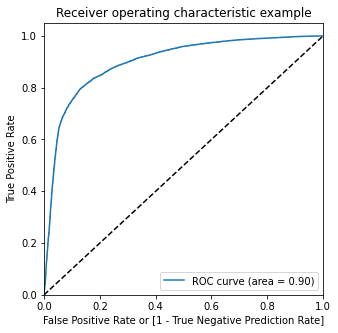

In [104]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

#### Finding Optimal Cutoff Point


In [105]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.462133,0,1,1,1,1,1,0,0,0,0,0
1,1,0.929693,1,1,1,1,1,1,1,1,1,1,1
2,0,0.023311,0,1,0,0,0,0,0,0,0,0,0
3,0,0.521673,1,1,1,1,1,1,1,0,0,0,0
4,0,0.735334,1,1,1,1,1,1,1,1,1,0,0


In [106]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0  0.0          0.500000  1.000000     0.000000   
0.1  0.1          0.683293  0.974957     0.391629   
0.2  0.2          0.743065  0.951228     0.534901   
0.3  0.3          0.782255  0.919958     0.644552   
0.4  0.4          0.810377  0.885368     0.735386   
0.5  0.5          0.824870  0.845175     0.804566   
0.6  0.6          0.832722  0.796749     0.868696   
0.7  0.7          0.819613  0.722103     0.917122   
0.8  0.8          0.766482  0.577793     0.955171   
0.9  0.9          0.608717  0.234521     0.982912   


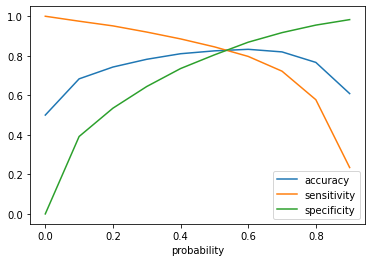

In [107]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**Initially we selected the optimum point of classification as 0.5.<br><br>From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range.**

In [108]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.462133,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.929693,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.023311,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.521673,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0,0.735334,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1


In [109]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50  0.50         0.824870  0.845175     0.804566   
0.51  0.51         0.826773  0.842062     0.811484   
0.52  0.52         0.828571  0.838395     0.818748   
0.53  0.53         0.829298  0.833068     0.825527   
0.54  0.54         0.829505  0.827534     0.831477   
0.55  0.55         0.830439  0.822899     0.837980   
0.56  0.56         0.831235  0.818402     0.844068   
0.57  0.57         0.831581  0.813767     0.849395   
0.58  0.58         0.831615  0.807887     0.855344   
0.59  0.59         0.832065  0.802629     0.861501   


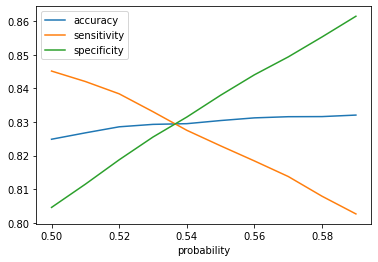

In [110]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at `0.54`**

In [111]:
#### From the curve above,we can take 0.54 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.462133,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.929693,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.023311,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.521673,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4,0,0.735334,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1


In [112]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8292978208232445


In [113]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[11933  2522]
 [ 2413 12042]]


In [114]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8330681425112418
Specificity =  0.8255274991352474
False Positive Rate =  0.1744725008647527
Precision =  0.826833287558363
True Negative Prediction Rate =  0.8317998048236442


#### Precision and recall tradeoff


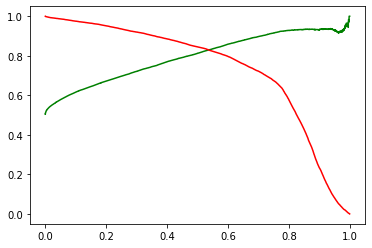

In [115]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set
**Transforming and feature selection for test data**

In [116]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,isd_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_7,total_og_mou_8,std_ic_mou_8,total_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tenure,avg_arpu_6_7
15213,0.027423,0.010572,0.001738,0.000000,0.230827,0.038560,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.026877,0.00000,0.000000,0.000000,0.000357,0.000000,0.000000,0.141176,0.036232,0.021739,0.000000,0.027431,0.033343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.072464,0.031985
4229,0.034596,0.044357,0.003550,0.005270,0.013873,0.019583,0.004036,0.000000,0.000002,0.0,0.000000,0.0,0.0,0.017722,0.00661,0.000731,0.023340,0.000342,0.000455,0.001372,0.052941,0.043478,0.021739,0.004303,0.029925,0.046681,0.039335,0.099035,0.099035,0.112540,0.000261,0.000070,0.002909,0.021951,0.027973,0.016452,0.5,0.5,0.5,0.25,0.2,0.4,0.000000,0.0,0.0,0.0,1.0,0.007328,0.020946,0.016365,0.014493,0.025160
12573,0.029726,0.029326,0.009352,0.000068,0.136577,0.213513,0.009037,0.000085,0.009004,0.0,0.005707,0.0,0.0,0.161518,0.00920,0.000365,0.000585,0.000000,0.000000,0.000000,0.052941,0.079710,0.021739,0.000662,0.027431,0.033343,0.006743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.033341
19178,0.052097,0.078142,0.049328,0.041272,0.059096,0.048713,0.061279,0.049712,0.040981,0.0,0.000000,0.0,0.0,0.083179,0.09174,0.000524,0.036805,0.000342,0.000000,0.000000,0.182353,0.289855,0.239130,0.021536,0.022444,0.009094,0.022477,0.000000,0.016077,0.010932,0.000000,0.051287,0.008589,0.000000,0.000000,0.000000,0.0,0.5,0.5,0.00,0.0,0.0,0.045455,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.007246,0.036936
15524,0.027423,0.107705,0.037836,0.000000,0.098439,0.067828,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.080973,0.00000,0.000000,0.000000,0.005476,0.000000,0.000000,0.111765,0.079710,0.043478,0.000000,0.027431,0.033343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.072464,0.032732


In [117]:
# Feature selection
X_test=X_test[rfe_columns]
X_test.head()

,arpu_8,onnet_mou_7,offnet_mou_6,offnet_mou_7,total_og_mou_8,std_ic_mou_8,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,aug_vbc_3g,avg_arpu_6_7
15213,0.027423,0.001738,0.230827,0.038560,0.00000,0.000000,0.000000,0.141176,0.036232,0.021739,0.000000,0.027431,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.031985
4229,0.034596,0.003550,0.013873,0.019583,0.00661,0.000731,0.023340,0.052941,0.043478,0.021739,0.004303,0.029925,0.039335,0.002909,0.016452,0.4,0.000000,0.0,0.007328,0.025160
12573,0.029726,0.009352,0.136577,0.213513,0.00920,0.000365,0.000585,0.052941,0.079710,0.021739,0.000662,0.027431,0.006743,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.033341
19178,0.052097,0.049328,0.059096,0.048713,0.09174,0.000524,0.036805,0.182353,0.289855,0.239130,0.021536,0.022444,0.022477,0.008589,0.000000,0.0,0.045455,0.0,0.000000,0.036936
15524,0.027423,0.037836,0.098439,0.067828,0.00000,0.000000,0.000000,0.111765,0.079710,0.043478,0.000000,0.027431,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.032732


In [118]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

## Predicting the target variable

In [119]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 15213    0.899673
4229     0.063684
12573    0.919032
19178    0.063022
15524    0.903480
17429    0.820392
9740     0.276279
12546    0.002772
20591    0.178271
13319    0.181919
dtype: float64


In [120]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
15213,0.899673
4229,0.063684
12573,0.919032
19178,0.063022
15524,0.903480


In [121]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [122]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_probability
15213,1
4229,0
12573,0
19178,0
15524,1


In [123]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn_probability,Conv_prob
15213,1,0.899673
4229,0,0.063684
12573,0,0.919032
19178,0,0.063022
15524,1,0.903480


In [124]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn_probability,Conv_prob,test_churn_pred
15213,1,0.899673,1
4229,0,0.063684,0
12573,0,0.919032,1
19178,0,0.063022,0
15524,1,0.903480,1


In [125]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred)

0.828511610201751

**Metrics Evaluation**

In [126]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn_probability, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[4004  815]
 [  86  349]]


In [127]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [128]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.8022988505747126
Specificity =  0.8308777754720896
False Positive Rate =  0.16912222452791034
Precision =  0.29982817869415807
True Negative Prediction Rate =  0.9789731051344743


### Explaining the results

In [129]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn_probability, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  83.0 %
The sensitivity of the predicted model is:  80.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



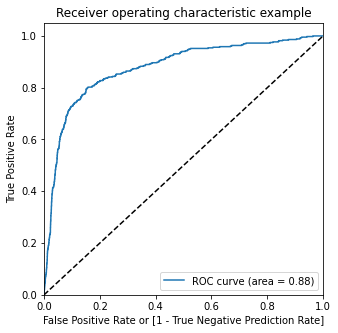

In [130]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn_probability,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn_probability,y_pred_final.Conv_prob)

## The AUC score for train dataset is 0.90 and the test dataset is 0.88.
# This model can be considered as a good model.**

# PCA

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=10)

In [132]:
X_train.shape

(16810, 52)

In [133]:
pca = PCA(random_state=42)

In [134]:
pca.fit(X_train)

PCA(random_state=42)

In [135]:
pca.components_

array([[-9.90426696e-03, -7.99182337e-02, -9.74727314e-02, ...,
         1.69848926e-01,  4.35447656e-05, -8.48816798e-03],
       [ 2.89311095e-01,  1.37346355e-01,  1.94653867e-01, ...,
         4.85641414e-02,  1.14273988e-05,  2.28091894e-01],
       [ 2.09177223e-01, -3.55776054e-01, -4.36148266e-01, ...,
        -8.86666119e-03,  2.99066021e-03,  1.33293061e-01],
       ...,
       [-1.38028760e-05, -2.34674783e-05,  4.40883678e-05, ...,
        -4.15145876e-05, -5.35559625e-05,  2.20451579e-05],
       [ 1.51530538e-05,  1.58107116e-05,  8.66603192e-05, ...,
        -1.68771451e-05, -6.33433153e-05, -1.55387058e-04],
       [ 3.29090533e-06, -1.00170417e-05, -3.46873775e-05, ...,
         4.05847431e-06, -1.46183671e-04, -7.30428886e-06]])

### Analysing the explained variance ratio

In [136]:
pca.explained_variance_ratio_

array([3.30757137e-01, 2.49757152e-01, 8.57094342e-02, 6.38745202e-02,
       4.43347508e-02, 3.43096102e-02, 3.36099665e-02, 3.05610553e-02,
       2.77727739e-02, 1.67762370e-02, 1.36537701e-02, 1.30483677e-02,
       7.50058659e-03, 6.74043417e-03, 6.28704581e-03, 5.68578769e-03,
       4.89873530e-03, 4.80169987e-03, 4.13830502e-03, 3.68999461e-03,
       2.31278963e-03, 2.23161812e-03, 1.89021336e-03, 1.48362031e-03,
       1.39183073e-03, 7.91994641e-04, 7.36442586e-04, 4.13517861e-04,
       3.46617688e-04, 1.68197691e-04, 1.23655371e-04, 8.38021042e-05,
       7.59094956e-05, 1.70732341e-05, 7.58275541e-06, 6.42388188e-06,
       3.60772927e-06, 3.11660159e-06, 1.79652537e-06, 1.54214163e-06,
       6.49773995e-07, 3.99551309e-07, 7.44145110e-08, 6.30229861e-08,
       2.30964343e-08, 1.78796157e-08, 1.60708675e-08, 1.42497337e-08,
       8.65279282e-09, 7.59070205e-09, 6.80550174e-09, 2.22153607e-09])

In [137]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

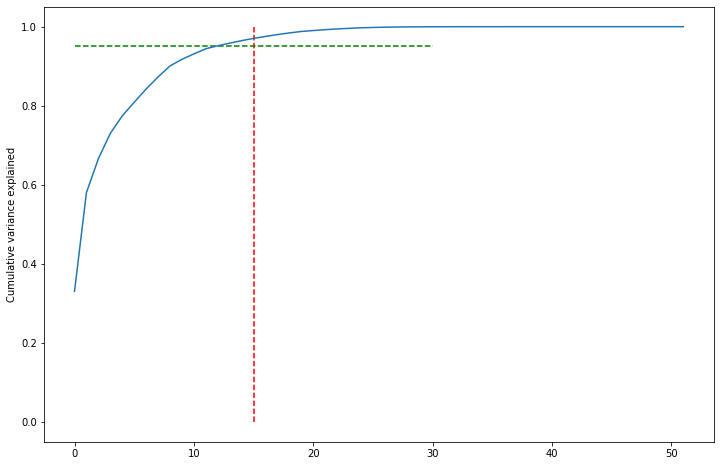

In [138]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

we can use IncrementalPCA for the best result

In [139]:
pca_final = IncrementalPCA(n_components=16)

In [140]:
df_train_pca = pca_final.fit_transform(X_train)

In [141]:
df_train_pca.shape

(16810, 16)

In [142]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [143]:
corrmat.shape

(16, 16)

In [144]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(4203, 16)

## Applying logistic regression on the Principal components

In [145]:
learner_pca = LogisticRegression()

In [146]:
model_pca = learner_pca.fit(df_train_pca, y_train)

## Making predictions on the test set


In [147]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [148]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.88'

### Confusion matrix, Sensitivity and Specificity


In [149]:
pred_probs_test1 = model_pca.predict(df_test_pca)

In [150]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, pred_probs_test1)
print(confusion)

[[3836   38]
 [ 279   50]]


In [151]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [152]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, pred_probs_test1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9245776826076612
Sensitivity:- 0.1519756838905775
Specificity:- 0.9901910170366546


## Making predictions on the train set

In [153]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [154]:
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1]))

'0.87'

### Confusion matrix, Sensitivity and Specificity


In [155]:
pred_probs_train1 = model_pca.predict(df_train_pca)

In [156]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, pred_probs_train1)
print(confusion)

[[15268   132]
 [ 1193   217]]


In [157]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [158]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, pred_probs_train1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9211778703152885
Sensitivity:- 0.15390070921985816
Specificity:- 0.9914285714285714


## Decision Tree with PCA

In [159]:
from sklearn.tree import DecisionTreeClassifier

In [160]:
dt = DecisionTreeClassifier(random_state=42)

In [161]:
from sklearn.model_selection import GridSearchCV

In [162]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50]
}

In [163]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [164]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [50, 150, 50]},
             scoring='accuracy', verbose=1)

In [165]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.086487,0.000987,0.001663,0.000030,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61
1,0.083833,0.000362,0.001467,0.000039,2,5,150,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 150}",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61
2,0.082354,0.000175,0.001514,0.000084,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 50}",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61
3,0.082313,0.000374,0.001499,0.000062,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 50}",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61
4,0.082280,0.000393,0.001477,0.000033,2,10,150,"{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 150}",0.916012,0.916012,0.91623,0.91623,0.916121,0.000109,61


In [166]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
54,0.304931,0.008399,0.001784,0.000045,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.925054,0.925529,0.921228,0.923132,0.923736,0.001703,1
56,0.304205,0.009238,0.001848,0.000077,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.925054,0.925529,0.921228,0.923132,0.923736,0.001703,1
69,0.341922,0.032915,0.001853,0.000035,20,50,50,"{'max_depth': 20, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.925054,0.925529,0.921228,0.923132,0.923736,0.001703,1
71,0.341679,0.034880,0.001815,0.000036,20,50,50,"{'max_depth': 20, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.925054,0.925529,0.921228,0.923132,0.923736,0.001703,1
55,0.300403,0.006901,0.001787,0.000016,10,50,150,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}",0.925291,0.923864,0.920990,0.922418,0.923141,0.001604,5


In [167]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

In [168]:
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=20,
                                  min_samples_split=50)

In [169]:
dt_best.fit(df_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [170]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [171]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [172]:
evaluate_model(dt_best)

Train Accuracy : 0.9365258774538965
Train Confusion Matrix:
[[15163   237]
 [  830   580]]
--------------------------------------------------
Test Accuracy : 0.926481084939329
Test Confusion Matrix:
[[3791   83]
 [ 226  103]]


##  Random Forest with PCA

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [174]:
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

7


In [175]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, max_features=7, random_state=100, oob_score=True, verbose=1)

In [176]:
rf.fit(df_train_pca, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.6s finished


RandomForestClassifier(max_depth=4, max_features=7, oob_score=True,
                       random_state=100, verbose=1)

In [177]:
rf.oob_score_

0.9190362879238548

In [178]:
from sklearn.metrics import plot_roc_curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


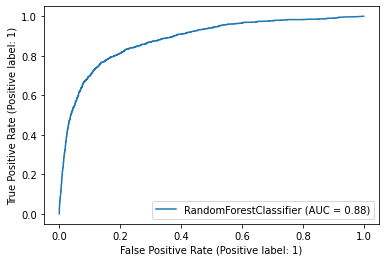

In [179]:
plot_roc_curve(rf, df_train_pca, y_train)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [180]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [181]:
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [50,100],
    'min_samples_split': [ 100, 150, ],
    'n_estimators': [100, 200 ]
}

In [182]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [183]:
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5], 'min_samples_leaf': [50, 100],
                         'min_samples_split': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [184]:
grid_search.best_score_

0.9187983544085767

In [185]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 100}

In [186]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200)

In [187]:
rfc_model.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=200)

In [188]:
evaluate_model(rfc_model)

Train Accuracy : 0.9205829863176681
Train Confusion Matrix:
[[15366    34]
 [ 1301   109]]
--------------------------------------------------
Test Accuracy : 0.9231501308589103
Test Confusion Matrix:
[[3863   11]
 [ 312   17]]


## Note:

Note that the best parameters procuded the accuracy of 91% which is not significantly deterred than the accuracy of original random forest, which is pegged around 92%

## Conclusion :

The best model to predict the churn is observed to be Random Forest based on the accuracy as performance measure.


The incoming calls (with local same operator mobile/other operator mobile/fixed lines, STD or Special) plays a vital role in understanding the possibility of churn. Hence, the operator should focus on incoming calls data and has to provide some kind of special offers to the customers whose incoming calls turning lower.

## Details:

 After cleaning the data, we broadly employed three models as mentioned below including some variations within these models in order to arrive at the best model in each of the cases.

### Logistic Regression  :

Logistic Regression with RFE Logistic regression with PCA Random Forest For each of these models, the summary of performance measures are as follows:

#### Logistic Regression

.  Train Accuracy : ~90%
. Test Accuracy : ~88%

#### Logistic regression with PCA

. Train Accuracy : ~92%
. Test Accuracy : ~92%

#### Decision Tree with PCA:

. Train Accuracy : ~94%
. Test Accuracy : ~93%


#### Random Forest with PCA:
. Train Accuracy :~ 92%
. Test Accuracy :~ 92%

In [189]:
churn_test = pd.read_csv("../input/telecom-churn-case-study-hackathon-38/test (1).csv")

In [190]:
churn_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [191]:
churn_test.shape

(30000, 171)

In [192]:
churn_test.isnull().sum()

id                          0    
circle_id                   0    
loc_og_t2o_mou              316  
std_og_t2o_mou              316  
loc_ic_t2o_mou              316  
last_date_of_month_6        0    
last_date_of_month_7        202  
last_date_of_month_8        367  
arpu_6                      0    
arpu_7                      0    
arpu_8                      0    
onnet_mou_6                 1169 
onnet_mou_7                 1172 
onnet_mou_8                 1675 
offnet_mou_6                1169 
offnet_mou_7                1172 
offnet_mou_8                1675 
roam_ic_mou_6               1169 
roam_ic_mou_7               1172 
roam_ic_mou_8               1675 
roam_og_mou_6               1169 
roam_og_mou_7               1172 
roam_og_mou_8               1675 
loc_og_t2t_mou_6            1169 
loc_og_t2t_mou_7            1172 
loc_og_t2t_mou_8            1675 
loc_og_t2m_mou_6            1169 
loc_og_t2m_mou_7            1172 
loc_og_t2m_mou_8            1675 
loc_og_t2f_mou

In [193]:
churn_id = churn_test['id']

In [194]:
churn_test['tenure'] = (churn_test['aon']/30).round(0)
churn_test["avg_arpu_6_7"]= (churn_test['arpu_6']+churn_test['arpu_7'])/2

churn_test = churn_test[X.columns]

In [195]:
churn_test.shape

(30000, 52)

In [196]:
churn_test_null = churn_test.isnull().sum().sum() / np.product(churn_test.shape) * 100
churn_test_null

11.436923076923076

In [197]:
for col in churn_test.columns:
    null_col = churn_test[col].isnull().sum() / churn_test.shape[0] * 100
    print("{} : {:.2f}".format(col,null_col))

arpu_8 : 0.00
onnet_mou_6 : 3.90
onnet_mou_7 : 3.91
onnet_mou_8 : 5.58
offnet_mou_6 : 3.90
offnet_mou_7 : 3.91
offnet_mou_8 : 5.58
std_og_t2t_mou_8 : 5.58
std_og_t2m_mou_8 : 5.58
isd_og_mou_8 : 5.58
og_others_6 : 3.90
og_others_7 : 3.91
og_others_8 : 5.58
total_og_mou_7 : 0.00
total_og_mou_8 : 0.00
std_ic_mou_8 : 5.58
total_ic_mou_8 : 0.00
ic_others_6 : 3.90
ic_others_7 : 3.91
ic_others_8 : 5.58
total_rech_num_6 : 0.00
total_rech_num_7 : 0.00
total_rech_num_8 : 0.00
total_rech_amt_8 : 0.00
max_rech_amt_6 : 0.00
max_rech_amt_7 : 0.00
max_rech_amt_8 : 0.00
max_rech_data_6 : 74.72
max_rech_data_7 : 74.31
max_rech_data_8 : 73.59
vol_2g_mb_6 : 0.00
vol_2g_mb_7 : 0.00
vol_2g_mb_8 : 0.00
vol_3g_mb_6 : 0.00
vol_3g_mb_7 : 0.00
vol_3g_mb_8 : 0.00
night_pck_user_6 : 74.72
night_pck_user_7 : 74.31
night_pck_user_8 : 73.59
monthly_2g_6 : 0.00
monthly_2g_7 : 0.00
monthly_2g_8 : 0.00
sachet_2g_8 : 0.00
monthly_3g_6 : 0.00
monthly_3g_7 : 0.00
monthly_3g_8 : 0.00
fb_user_8 : 73.59
aug_vbc_3g : 0.00
jul

In [198]:
for col in churn_test.columns:
    null_col = churn_test[col].isnull().sum() / churn_test.shape[0] * 100
    if null_col > 0:
        churn_test[col] = churn_test[col].fillna(churn_test[col].mode()[0])

In [199]:
churn_test.isnull().sum().sum()


0

In [200]:
churn_test_final = pca_final.transform(churn_test)

In [201]:
churn_test_final.shape

(30000, 16)

In [202]:
predict_probalbilty = rfc_model.predict(churn_test_final)

In [203]:
predict_probalbilty.shape

(30000,)

In [204]:
len(churn_id)

30000

In [205]:
final_prediction = pd.DataFrame({'id':churn_id,'churn_probability':predict_probalbilty})

In [206]:
final_prediction.to_csv('Submission.csv',index=False)